In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Review
From a random sample, construct a 95% confidence interval for the ages of the mothers in the population.

In [2]:
# original sample

births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [3]:
def one_bootstrap_mean():
    resample = births.sample()
    return np.average(resample.column('Maternal Age'))

In [4]:
# Generate means from 3000 bootstrap samples
num_repetitions = 3000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [5]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

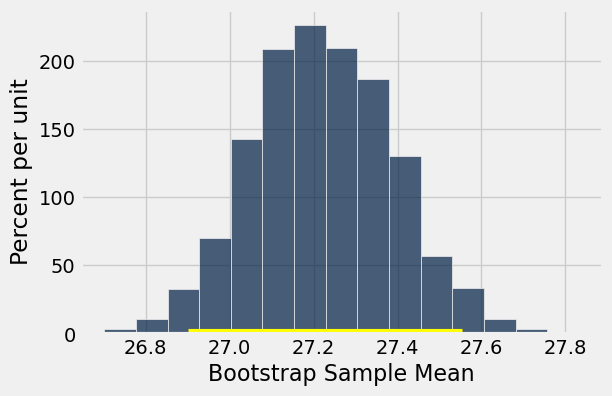

In [6]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

In [7]:
left, right

(26.901192504258944, 27.554514480408859)

## Method Based on CLT

In [8]:
sampled_ages = births.column('Maternal Age')
sample_size = len(sampled_ages)
sample_average = np.average(sampled_ages)
sample_SD = np.std(sampled_ages)

print(f"Sample Size: {sample_size}")
print(f"Sample Average: {sample_average}")
print(f"Sample SD: {sample_SD}")

Sample Size: 1174
Sample Average: 27.228279386712096
Sample SD: 5.815360404190897


We need to add and subtract $2 \cdot ( \frac{\text{Population SD}}{\sqrt{\text{Sample_Size}}})$ but we don't have the population SD.

In [9]:
# Try estimating it from the sample

estimated_SD_of_sample_average = sample_SD / (sample_size**0.5)
estimated_SD_of_sample_average

0.16972373742299796

In [10]:
# Approximate 95% confidence interval for population mean

sample_average - 2*estimated_SD_of_sample_average, sample_average + 2*estimated_SD_of_sample_average

(26.888831911866099, 27.567726861558093)

## SD of 0/1 population

In [11]:
# population of size 10

number_of_ones = 2
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))

print('Standard Deviation:', np.round(np.std(zero_one_population),2))

zero_one_population

Standard Deviation: 0.4


array([ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [12]:
def sd_of_zero_one_population(number_of_ones):
    """Returns the SD of a population 
    that has 10 elements: num_ones with value 1 and (10 - num_ones) with value 0"""
    zero_one_population = np.append(np.ones(number_of_ones), 
                                    np.zeros(10 - number_of_ones))
    return np.std(zero_one_population)

In [13]:
possible_ones = np.arange(11)
zero_one_pop = Table().with_columns(
    'Number of Ones', possible_ones,
    'Proportion of Ones', possible_ones / 10
)
zero_one_pop.show()

Number of Ones,Proportion of Ones
0,0
1,0.1
2,0.2
3,0.3
4,0.4
5,0.5
6,0.6
7,0.7
8,0.8
9,0.9


In [14]:
sds = zero_one_pop.apply(sd_of_zero_one_population, 'Number of Ones')
zero_one_pop = zero_one_pop.with_column('Pop SD', sds)
zero_one_pop.show()

Number of Ones,Proportion of Ones,Pop SD
0,0,0
1,0.1,0.3
2,0.2,0.4
3,0.3,0.458258
4,0.4,0.489898
5,0.5,0.5
6,0.6,0.489898
7,0.7,0.458258
8,0.8,0.4
9,0.9,0.3


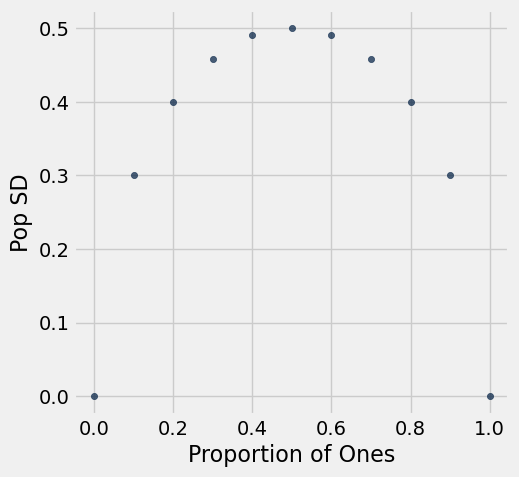

In [15]:
zero_one_pop.scatter('Proportion of Ones', 'Pop SD')